In [1]:
from company_analysis import analyze_company
from comparative_analysis import compare_companies

from data_extraction import extract_financial_data
from ratios import calculate_ratios_timeseries

from visualization import plot_metrics, plot_ratios, plot_comparison

In [21]:
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
results=analyze_company("AMD")


Analysis: AMD (Most Recent Period)
Period: 2025-09-30

Profitability
--------------------------------------------------
  ROE (%)............................       2.04
  ROA (%)............................       1.62
  Net Margin (%).....................      13.44

Liquidity
--------------------------------------------------
  Current Ratio......................       2.31
  Quick Ratio........................       0.94

Leverage
--------------------------------------------------
  Debt/Equity........................       0.06

Cash Flow
--------------------------------------------------
  FCF ($M)...........................    1564.08


In [3]:
compare_companies(['LDO.MI', 'IVG.VI'], tax_rate=0.21)

,ROE (%),ROA (%),Net Margin (%),Current Ratio,Quick Ratio,Debt/Equity,FCF ($M)
LDO.MI,1.377931,0.379251,2.605042,0.973148,0.298224,0.472052,578.75
IVG.VI,1.141553,0.168653,0.963082,1.286633,0.279001,2.224505,120.06


In [4]:
df = extract_financial_data('LDO.MI')

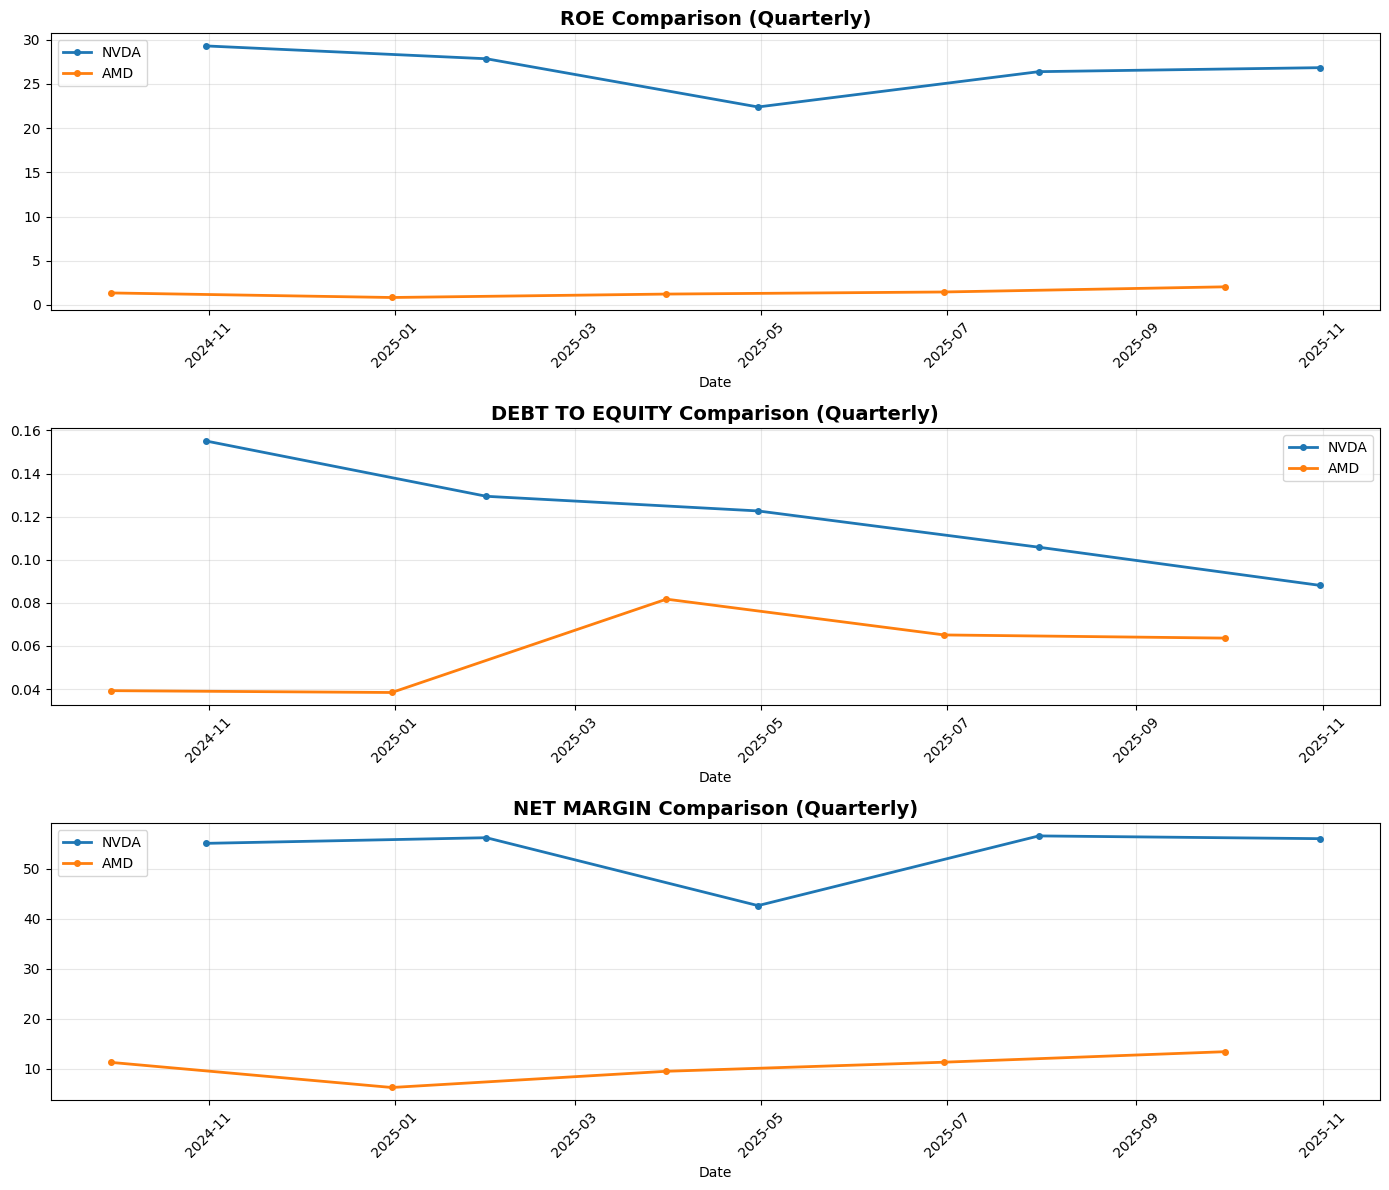

In [5]:
plot_comparison(['NVDA', 'AMD'], metrics=['roe', 'debt_to_equity', 'net_margin'])

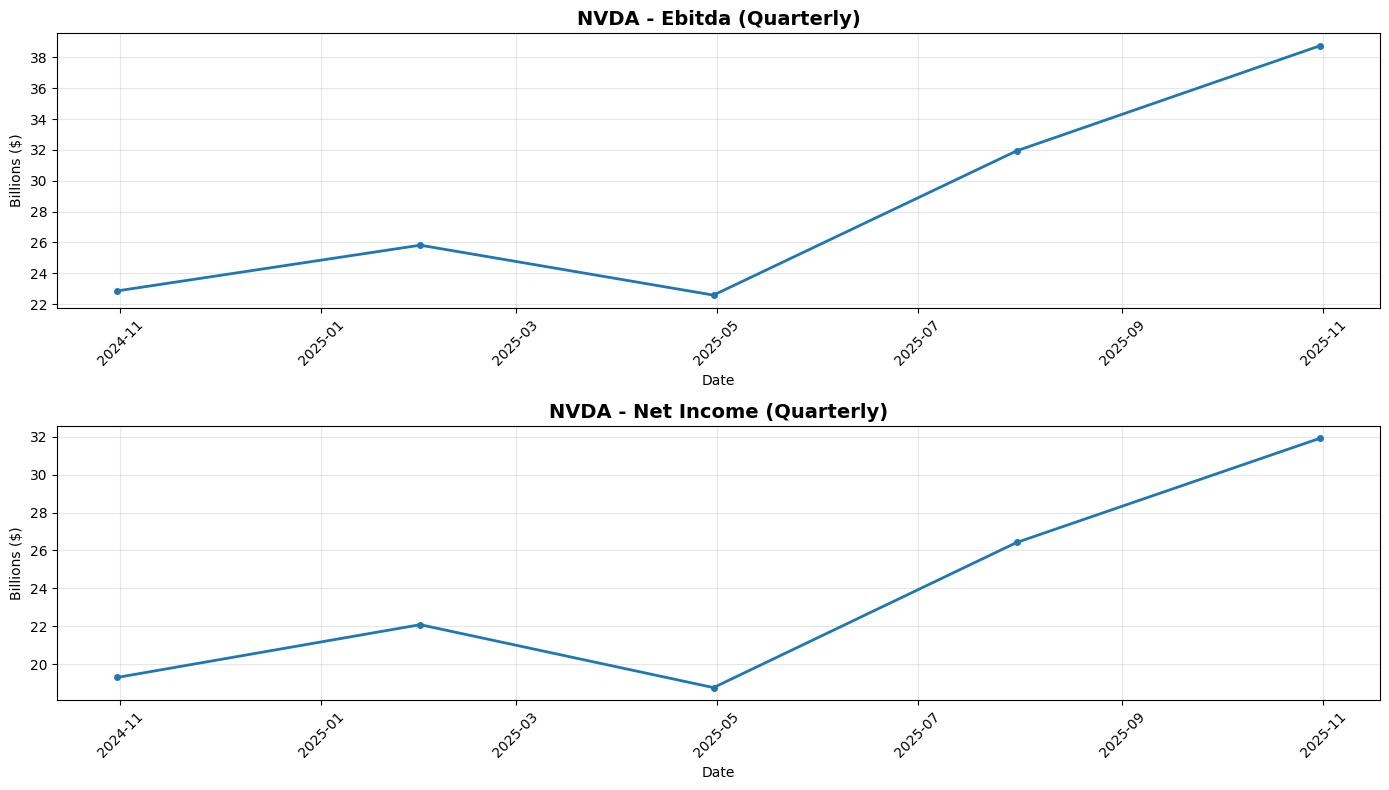

In [6]:
plot_metrics('NVDA', metrics=['ebitda', 'net_income'])

In [7]:
from dcf_analysis import (
    calculate_historical_growth, get_risk_free_rate,
    calculate_market_return, calculate_effective_tax_rate, calculate_wacc,
    dcf_valuation, print_dcf_report
)

from dcf_sensitivity_analysis import dcf_sensitivity_analysis, dcf_comparison

In [8]:
summary = dcf_valuation('AMD')

In [9]:
print_dcf_report(summary)


DCF VALUATION: AMD

Valuation Summary
--------------------------------------------------
  Current Price...................... $    206.13
  Fair Value (DCF)................... $     19.76
  Upside/(Downside)..................      -90.4%

Data-Driven Assumptions
--------------------------------------------------
  Growth Rate (5Y)...................       7.83%
  WACC...............................      20.08%
  Beta...............................       1.91
  Risk-Free Rate (10Y Treasury)......       4.00%
  Market Return (S&P 500 10Y)........      12.46%
  Effective Tax Rate.................      17.50%

Value Breakdown
--------------------------------------------------
  Current FCF........................ $      4258M
  Enterprise Value................... $     30591M
  Equity Value....................... $     32166M



In [10]:
dcf_sensitivity_analysis('AMD')


DCF SENSITIVITY ANALYSIS: AMD

Current Price: $206.13

Data-Driven Assumptions:
  Historical FCF Growth (CAGR).......   10.7%
  Historical Revenue Growth (CAGR)...   16.2%
  Effective Tax Rate.................   17.5%
  Risk-Free Rate (10Y Treasury)......    4.0%

Scenario     Growth     Term.Grw   Fair Value   Upside    
----------------------------------------------------------------------
Bear            5.3%       2.0%    $   17.61      -91.5%
Base            8.5%       3.0%    $   20.24      -90.2%
Bull           12.8%       4.0%    $   24.23      -88.2%

Investment Decision:
----------------------------------------------------------------------
  AVOID - Limited upside across scenarios



,fair_value,upside_pct,growth_rate,terminal_growth,description,current_price
Bear,17.609709,-91.456989,5.33568,2.0,Conservative (50% historical growth),206.13
Base,20.236858,-90.182478,8.537088,3.0,Realistic (80% historical growth),206.13
Bull,24.22541,-88.247509,12.805632,4.0,Optimistic (120% historical growth),206.13


In [11]:
dcf_comparison(['AMD', 'NVDA'])

,Current Price,Fair Value,Upside (%),Growth Rate (%),WACC (%)
NVDA,177.82,152.135948,-14.443849,79.646141,23.153383
AMD,206.13,19.757745,-90.414911,7.834759,20.081045


In [12]:
from dcf_monte_carlo import (
    calculate_growth_volatility, dcf_monte_carlo, print_monte_carlo_report,
    plot_monte_carlo_distribution, monte_carlo_comparison
)

In [13]:
print_monte_carlo_report(dcf_monte_carlo('AMD'))


MONTE CARLO DCF ANALYSIS: AMD
Simulations: 10,000

Current Market Price: $206.13

Probabilistic Fair Value Estimates
----------------------------------------------------------------------
  Mean Fair Value.................... $     27.49
  Median Fair Value.................. $     22.40
  Standard Deviation................. $     11.89

Confidence Intervals
----------------------------------------------------------------------
  10th Percentile (Pessimistic)...... $     15.65
  25th Percentile.................... $     16.12
  75th Percentile.................... $     40.91
  90th Percentile (Optimistic)....... $     43.24
  80% Confidence Range............... $15.65 - $43.24

Probabilistic Assessment
----------------------------------------------------------------------
  Probability Undervalued............        0.0%
  Expected Upside (Mean).............      -86.7%
  Expected Upside (Median)...........      -89.1%

Historical Parameters Used
---------------------------------------

In [14]:
monte_carlo_comparison(['AMD', 'NVDA'])

,Current Price,Mean Fair Value,Median Fair Value,P(Undervalued) %,Expected Upside %,80% CI Lower,80% CI Upper,Recommendation
AMD,206.13,27.326862,22.297631,0.0,-86.742899,15.672216,43.064173,STRONG SELL
NVDA,177.82,33.739923,44.559977,0.0,-81.025799,16.368065,46.387142,STRONG SELL


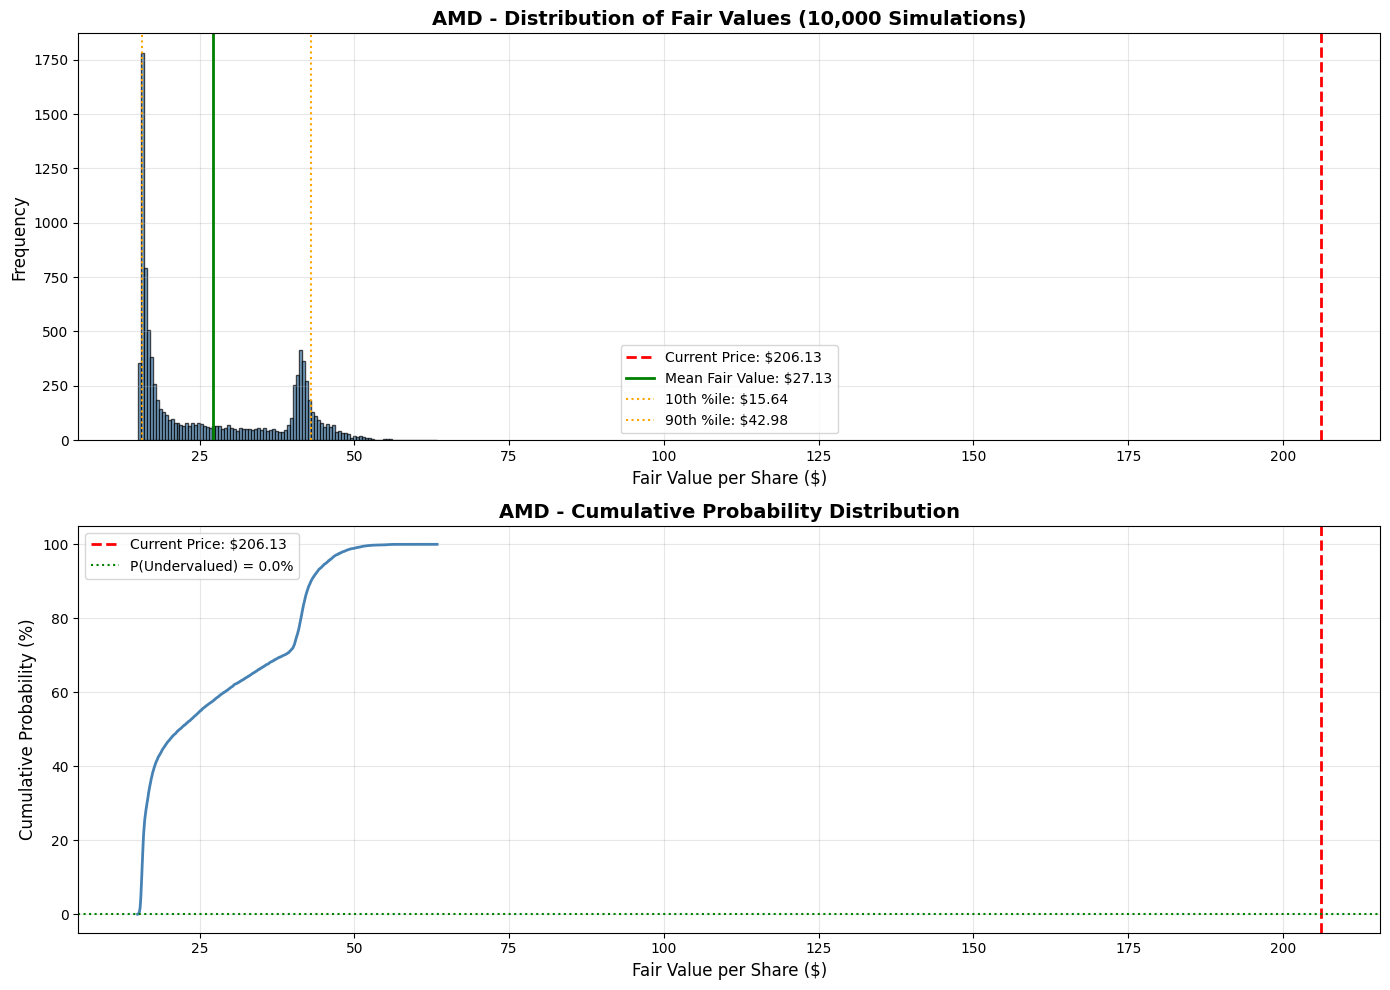

In [15]:
plot_monte_carlo_distribution(dcf_monte_carlo('AMD'))

In [17]:
stock = yf.Ticker('AMD')

In [37]:
data = yf.download('AAPL', start='2020-1-1')

C:\Users\matte\AppData\Local\Temp\ipykernel_12240\2647678309.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-1-1')
[*********************100%***********************]  1 of 1 completed


In [38]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468277,72.528597,71.223274,71.476615,135480400
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2020-01-06,72.335556,72.374162,70.634539,70.885472,118387200
2020-01-07,71.995361,72.600968,71.775796,72.345212,108872000
2020-01-08,73.153488,73.455087,71.698574,71.698574,132079200
...,...,...,...,...,...
2025-11-19,268.559998,272.209991,265.500000,265.529999,40424500
2025-11-20,266.250000,275.429993,265.920013,270.829987,45823600


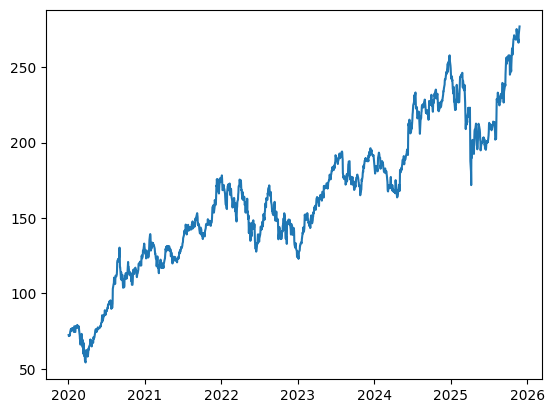

In [39]:
plt.plot(data['Close'])

In [40]:
ret = data['Close'].pct_change()

<Axes: xlabel='Date'>

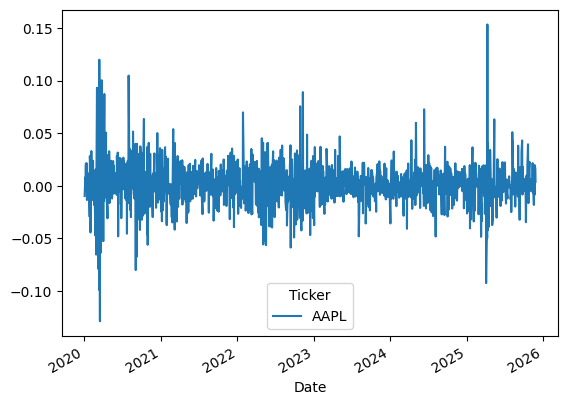

In [41]:
ret.plot()